In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Your Question3 here

a. Use the results of question 1.b) to find the couple $(x, y)$ that minimizes $f(x, y)$

In [2]:
##### Initial values of x and y
x = 7
y = 12

####Learning parameters
mu = 0.01
num_iter = 3000   

##### Note :  

For a fixed learning rate, if the value of your parameters (in this case x and y) and/or the function to optimized doesn't converge to some fixed values, that means the number of iteration is not enough and you have to increase it. 

In [3]:
#### Gradient descent
def GD_com_func(x,y,mu,num_iter):
    x_vals = []
    y_vals = []
    for i in range(num_iter):
        ## Run the update
        x = x-mu*(x/np.sqrt(x**2+y**2+np.pi))
        y = y-mu*(y/np.sqrt(x**2+y**2+np.pi))
    
        ## Save the values of x and y for plotting
        x_vals.append(x)
        y_vals.append(y)
    return x_vals, y_vals

In [4]:
x_vals, y_vals = GD_com_func(x,y,mu,num_iter)

In [5]:
### Values of x and y

x_final = x_vals[-1]
y_final = y_vals[-1]

print('We find x=',x_final,'and y = ',y_final)

We find x= 6.777084542620866e-05 and y =  0.00011603302919539222


b. Plot the values of x and y during the iterative process.

Text(0.5, 0, 'Iteration')

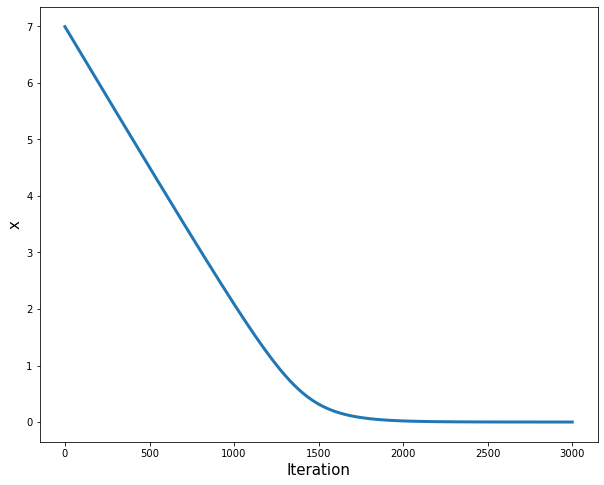

In [6]:
#===============================
# visualizing the values of x
#================================

plt.figure(figsize=(10,8))
plt.plot(x_vals, linewidth=3 )
plt.ylabel('x', fontsize = 15)
plt.xlabel('Iteration', fontsize = 15)

Text(0.5, 0, 'Iteration')

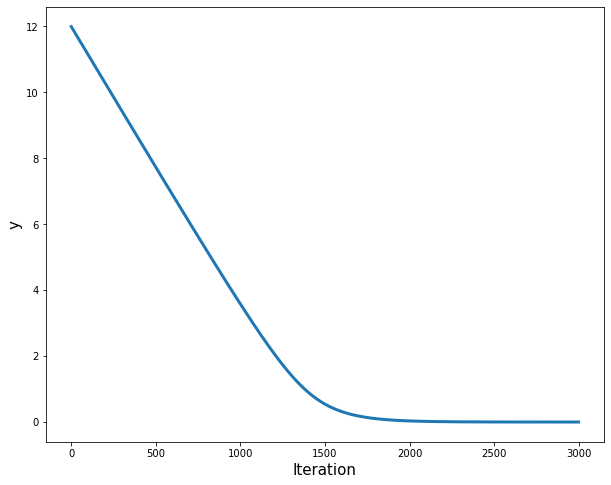

In [7]:
#===============================
# visualizing the values of y
#================================

plt.figure(figsize=(10,8))
plt.plot(y_vals, linewidth=3 )
plt.ylabel('y', fontsize = 15)
plt.xlabel('Iteration', fontsize = 15)

C. Compute $f(x_{final}, y_{final})$ and compare with the result of question 1.

You have to compute the value of $\sqrt{\pi}$ and compare with your result (the result is given below). The two value are very close.

In [8]:
f = lambda x,y : np.sqrt(x**2+y**2+np.pi)

In [9]:
f(x_final,y_final)

1.7724538559991752

In [10]:
np.sqrt(np.pi)

1.7724538509055159

#### For  Question4

In [11]:
### load the data

data = np.loadtxt('Assignment-data_week3.csv', dtype=float, delimiter=',', converters={0:float , 1:float })

In [12]:
x = data[:,0]
y = data[:,1]

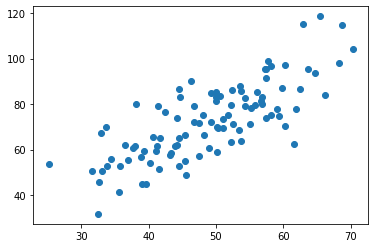

In [13]:
plt.scatter(x, y)

In [14]:
# CONSTRUCT THE DESIGN MATRIX
X = np.column_stack([x**0,x])
X.shape

(100, 2)

In [15]:
def MAE(X, y, w_0, w_1):
    """
       Input
        X : design matrix
        y : the responses
        w_0,w_1 : initial guess

        Return
        loss : the loss evaluated at (t)
        
       """
    m = len(y)
    w = [w_0, w_1]
    loss = sum(abs(np.dot(X,w)-y))/m    #YOU CODE HERE
    
    return loss

In [16]:
def computeGradients(x, y, w_0, w_1):
       """
       Input
        x : the treatment or input
        y : the responses
        w_0,w_1 : initial guess

        Return
        grad_0, grad_1: gradients of the loss evaluated at (t)

       """
       y_hat = w_0 + w_1*x 
       n = len(y)
       #IMPLEMENT THE gradients with respect to w_0 and w_1

       grad_w1 = (-1/n) * sum( (x * (y - y_hat)) /abs(y - y_hat) ) #YOU CODE HERE
       grad_w0 = (-1/n) * sum( (y - y_hat) /abs(y - y_hat) )       #YOUR CODE HERE
       return [grad_w0, grad_w1]

In [17]:
# initialize the weight
w_0 = 0
w_1 = 0

# Define the learning parameters
eta = 0.002

num_iters = 300

In [18]:
### Gradient descent
lossVals = []
for i in range(num_iters):
    loss = MAE(X, y, w_0, w_1)
        
    # IMPLEMENT THE UPDATE

    w_0 = w_0 -eta*computeGradients(x, y, w_0, w_1)[0]
    w_1 = w_1 -eta*computeGradients(x, y, w_0, w_1)[1]
        
    lossVals.append(loss)

Text(0.5, 0, 'Iteration')

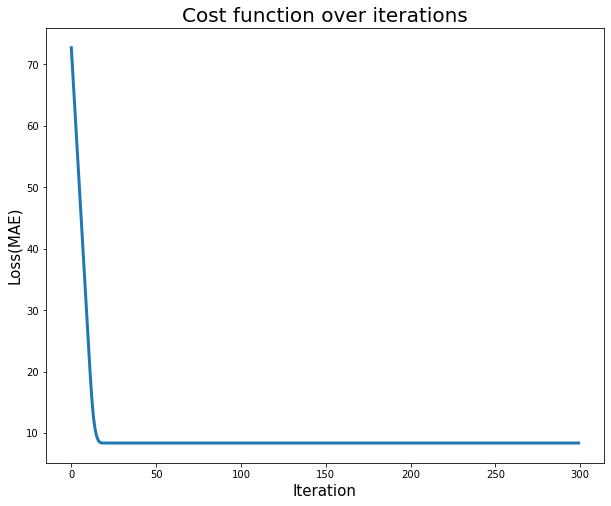

In [19]:
#===============================
# visualizing the cost function
#================================

plt.figure(figsize=(10,8))
plt.plot(lossVals, linewidth=3 )
plt.title('Cost function over iterations',fontsize=20)
plt.ylabel('Loss(MAE)',fontsize=15)
plt.xlabel('Iteration',fontsize=15)